In [1]:
import os
import sys
import pandas as pd

sys.path.insert(0, r'C:\\Users\\Matt\\Documents\\Development\\VolAdjGIPDashboard\\VolAdjGIPDashboard')

#sys.path.insert(0, '/home/matt/src/VolAdjGIPDashboard/VolAdjGIPDashboard')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "VolAdjGIPDashboard.settings")
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

import django
django.setup()

In [2]:
from DataAcquisition.models import QuadForecasts
gdp, cpi, latest_date = QuadForecasts.fetch_usa_gi_data() # 20191108, both series verified against FRED.
display(gdp.tail(5))
display(cpi.tail(5))

DATE
2020-06-30    17258.205
2020-09-30    18560.774
2020-12-31    18767.778
2021-03-31    19055.655
2021-06-30    19368.310
Freq: Q-DEC, Name: GDPC1, dtype: float64

2020-12-31 00:00:00    260.363667
2021-03-31 00:00:00    263.157667
2021-06-30             265.760000
2021-09-30             268.013333
2021-12-31             267.445000
dtype: float64

In [4]:
gdp_set, latest_date = QuadForecasts.get_gdp_set(gdp) # issue is probably related to GDPNow. # maybe not; deleted code, still lying to me

In [5]:
gdp_set.tail(20)

growth  best_estimate
quarter    date                               
2021-06-30 2021-06-11  1.010339   19252.663095
           2021-06-18  1.009100   19229.062012
           2021-06-25  1.008369   19215.138325
           2021-07-02  1.007979   19207.699966
           2021-07-09  1.007881   19205.839025
           2021-07-16  1.007881   19205.839025
           2021-07-23  1.007808   19204.442965
2021-09-30 2021-06-04  1.013307   19626.044500
           2021-06-11  1.012970   19619.525920
           2021-06-18  1.010944   19580.277327
           2021-06-25  1.010120   19564.323674
           2021-07-02  1.009513   19552.568100
           2021-07-09  1.009392   19550.214439
           2021-07-16  1.010363   19569.019976
           2021-07-23  1.010169   19565.263205
           2021-07-30  1.010314   19568.080986
           2021-08-06  1.009222   19546.917884
           2021-08-13  1.009343   19549.272736
           2021-08-20  1.008589   19534.658914
           2021-08-27  1.009343   19549.272736

In [6]:
for forecast in QuadForecasts.objects.all().order_by(('date')):
    print(f"quarter_end_date={forecast.quarter_end_date}, date={forecast.date}, quad={forecast.quad}")

quarter_end_date=2019-03-31, date=2019-01-11, quad=1
quarter_end_date=2019-03-31, date=2019-01-18, quad=1
quarter_end_date=2019-03-31, date=2019-01-25, quad=1
quarter_end_date=2019-03-31, date=2019-02-01, quad=1
quarter_end_date=2019-03-31, date=2019-02-08, quad=1
quarter_end_date=2019-03-31, date=2019-02-15, quad=1
quarter_end_date=2019-03-31, date=2019-02-22, quad=1
quarter_end_date=2019-03-31, date=2019-03-01, quad=1
quarter_end_date=2019-03-31, date=2019-03-08, quad=1
quarter_end_date=2019-03-31, date=2019-03-15, quad=1
quarter_end_date=2019-03-31, date=2019-03-22, quad=1
quarter_end_date=2019-03-31, date=2019-03-29, quad=1
quarter_end_date=2019-06-30, date=2019-04-05, quad=3
quarter_end_date=2019-06-30, date=2019-04-12, quad=3
quarter_end_date=2019-06-30, date=2019-04-19, quad=3
quarter_end_date=2019-06-30, date=2019-04-26, quad=3
quarter_end_date=2019-06-30, date=2019-05-03, quad=3
quarter_end_date=2019-06-30, date=2019-05-10, quad=3
quarter_end_date=2019-06-30, date=2019-05-17, 

quarter_end_date=1994-06-30, date=2021-04-16, quad=1
quarter_end_date=1994-09-30, date=2021-04-16, quad=2
quarter_end_date=1994-12-31, date=2021-04-16, quad=4
quarter_end_date=1995-03-31, date=2021-04-16, quad=3
quarter_end_date=1995-06-30, date=2021-04-16, quad=3
quarter_end_date=1995-09-30, date=2021-04-16, quad=1
quarter_end_date=1995-12-31, date=2021-04-16, quad=3
quarter_end_date=1996-03-31, date=2021-04-16, quad=2
quarter_end_date=1996-06-30, date=2021-04-16, quad=2
quarter_end_date=1996-09-30, date=2021-04-16, quad=2
quarter_end_date=1996-12-31, date=2021-04-16, quad=2
quarter_end_date=1997-03-31, date=2021-04-16, quad=4
quarter_end_date=1997-06-30, date=2021-04-16, quad=4
quarter_end_date=1997-09-30, date=2021-04-16, quad=1
quarter_end_date=1997-12-31, date=2021-04-16, quad=4
quarter_end_date=1998-03-31, date=2021-04-16, quad=1
quarter_end_date=1998-06-30, date=2021-04-16, quad=3
quarter_end_date=1998-09-30, date=2021-04-16, quad=1
quarter_end_date=1998-12-31, date=2021-04-16, 

In [7]:
gdp, cpi, latest_data = QuadForecasts.fetch_usa_gi_data()
usa_quads, latest_data = QuadForecasts.determine_quads(gdp, cpi)

usa_quads = usa_quads[
    (usa_quads.index.get_level_values('date') <= usa_quads.index.get_level_values('quarter')) &
    (usa_quads.index.get_level_values('date') > usa_quads.index.get_level_values('quarter') - pd.offsets.QuarterEnd())
].droplevel('quarter')

usa_quads['changed'] = usa_quads.quad != usa_quads.shift(1).quad
#usa_quads = usa_quads[usa_quads.changed == True].drop(['changed'], axis='columns')

In [8]:
usa_quads.tail(20)

,gdp_roc,cpi_roc,quad,changed
date,,,,
2021-04-16,1107.111084,156.640891,2.0,False
2021-04-23,1110.850115,156.640891,2.0,False
2021-04-30,1129.754758,156.640891,2.0,False
2021-05-07,1124.173228,156.640891,2.0,False
2021-05-14,1119.648715,156.640891,2.0,False
2021-05-21,1111.650848,156.640891,2.0,False
2021-05-28,1101.495481,156.640891,2.0,False
2021-06-04,1105.507491,156.640891,2.0,False
2021-06-11,1100.960220,156.640891,2.0,False


In [57]:
from DataAcquisition.models import YahooHistory
YahooHistory.update(tickers=('QQQ', 'XLF', 'XLI', 'GLD', 'TLT', 'UUP', 'XLU', 'VTI', 'BND'))
YahooHistory.calculate_stats()
YahooHistory.update_quad_return()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [58]:
from DataAcquisition.models import QuadReturn, YahooHistory
quad_returns = pd.DataFrame(
    QuadReturn.objects.filter(label__in=('YahooHistory_QQQ', 'YahooHistory_QQQ,XLF,XLI', 'YahooHistory_GLD', 'YahooHistory_TLT,UUP,XLU', 'YahooHistory_VTI', 'YahooHistory_BND')).order_by('data_end_date').values_list(
        'quarter_end_date', 'data_end_date', 'label', 'quad_return', 'quad_stdev'
    ), columns = ['quarter_end_date', 'data_end_date', 'label', 'quad_return', 'quad_stdev']
)
quad_returns.quarter_end_date = pd.to_datetime(quad_returns.quarter_end_date)
quad_returns

,quarter_end_date,data_end_date,label,quad_return,quad_stdev
0,2000-03-31,2000-01-03,YahooHistory_QQQ,0.000000,1.000000
1,2000-03-31,2000-01-04,YahooHistory_QQQ,-0.068601,0.048508
2,2000-03-31,2000-01-05,YahooHistory_QQQ,-0.092347,0.034675
3,2000-03-31,2000-01-06,YahooHistory_QQQ,-0.154682,0.033906
4,2000-03-31,2000-01-07,YahooHistory_QQQ,-0.050131,0.079159
...,...,...,...,...,...
35581,2021-06-30,2021-06-30,YahooHistory_GLD,0.022534,0.008292
35582,2021-06-30,2021-06-30,YahooHistory_QQQ,0.091999,0.009805
35583,2021-06-30,2021-06-30,YahooHistory_VTI,0.064697,0.007001
35584,2021-06-30,2021-06-30,"YahooHistory_QQQ,XLF,XLI",0.059983,0.007704


In [59]:
quad_returns.join(other=usa_quads.quad, on="quarter_end_date").to_csv("quad_history.csv")

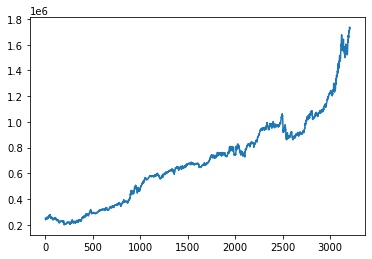

In [15]:
# Quick and dirty backtesting of a trend following strategy using this framework

cash_value = 250000.0

positioning = None
cost_basis = None

total_value_history = [cash_value]
for date, subframe in quad_returns.groupby('data_end_date'):
    best_performance = None
    best_label = None
    
    for identity, quarter_end_date, data_end_date, label, quad_return, quad_stdev in subframe.itertuples():
        if quad_stdev == 0:
            continue
        
        this_score = quad_return / quad_stdev
        if best_performance is None or this_score > best_performance:
            best_performance = this_score
            best_label = label
            
    current_prices = YahooHistory.objects.filter(date=date)
    if not current_prices:
        continue
    
    # liquidate positions
    if positioning is not None:
        for ticker in positioning:
            cash_value += positioning[ticker]*current_prices.get(ticker=ticker).close_price
        
        positioning = None
    
    total_value_history.append(cash_value)
    
    # OVERRIDE - VTI (total US market)
    #best_label = 'VTI'
    # add positions
    positioning = YahooHistory.equal_volatility_position(best_label.split(','), max_date=date, target_value=cash_value)
    cost_basis = dict()
    
    for ticker in positioning:
        price = current_prices.get(ticker=ticker).close_price
        cash_value -= positioning[ticker]*price
        cost_basis[ticker] = price       
    
import matplotlib.pyplot as plt
plt.plot(total_value_history)

In [16]:
high_water_mark = None
low_water_mark = None
max_drawdown = None

last_value = None
returns = list()

for value in total_value_history:
    if high_water_mark is None or value > high_water_mark:
        high_water_mark = value
    if low_water_mark is None or value < low_water_mark:
        low_water_mark = value
    
    if max_drawdown is None or (value < high_water_mark and value/high_water_mark - 1 < max_drawdown):
        max_drawdown = value/high_water_mark - 1
        
    if last_value is not None:
        returns.append(value/last_value - 1)
    last_value = value
        
print(f"max_drawdown={max_drawdown*100:.2f}%")
    

max_drawdown=-28.73%


In [17]:
import numpy as np

print(f"mean daily return: {np.mean(returns)*100:.2f}%")
print(f"mean daily stdev: {np.std(returns)*100:.2f}%")
print(f"performance ratio: {np.mean(returns)/np.std(returns)}")

mean daily return: 0.06%
mean daily stdev: 0.95%
performance ratio: 0.06793101151618193
